In [1]:
!pip install numpy seaborn pandas scikit-learn matplotlib 

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3d/a8/566578b10d8d0e9955b1b6cd5db4e9d4592dd0026a941ff7994cedda030a/numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 405.6 kB/s eta 0:00:00
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/86/41/585a168330ff063014880a80d744219dbf1dd7a1c706e75ab3425a987384/pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.o


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importação das bibliotecas

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [3]:
# Importação dos dados
# 1)

df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv")

In [4]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [5]:
dic = {
    'product_name': 'Produto','rating':'Avaliação','rating_count': 'Quantidade de avaliações', 'purchased':'Comprou'
}

In [6]:
df.rename(columns = dic, inplace = True)

In [7]:
df.head()

,Produto,Avaliação,Quantidade de avaliações,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Produto                   100 non-null    object 
 1   Avaliação                 100 non-null    float64
 2   Quantidade de avaliações  100 non-null    int64  
 3   Comprou                   100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [9]:
df.describe

<bound method NDFrame.describe of       Produto  Avaliação  Quantidade de avaliações  Comprou
0   Televisão       3.04                        29        1
1     Celular       3.46                      3872        0
2   Cafeteira       3.25                      1187        0
3   Televisão       3.77                      4097        1
4   Videogame       5.00                      4738        1
..        ...        ...                       ...      ...
95       iPod       4.44                      1372        0
96    Celular       4.66                      1690        1
97  Televisão       4.33                      3364        1
98   Notebook       3.30                      1825        1
99       iPod       4.08                       533        0

[100 rows x 4 columns]>

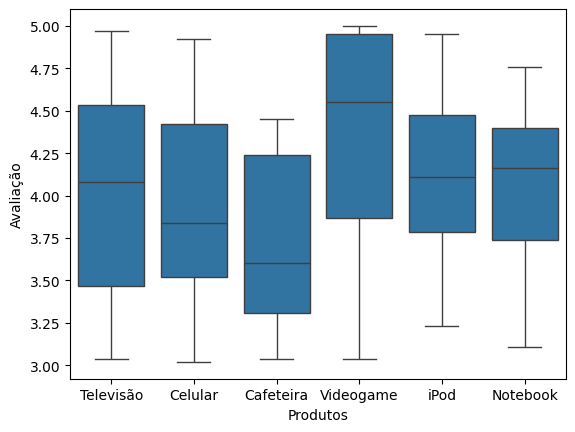

In [10]:
# 2)

sns.boxplot(x='Produto', y='Avaliação', data=df)
plt.xlabel('Produtos')
plt.ylabel('Avaliação')
plt.show()

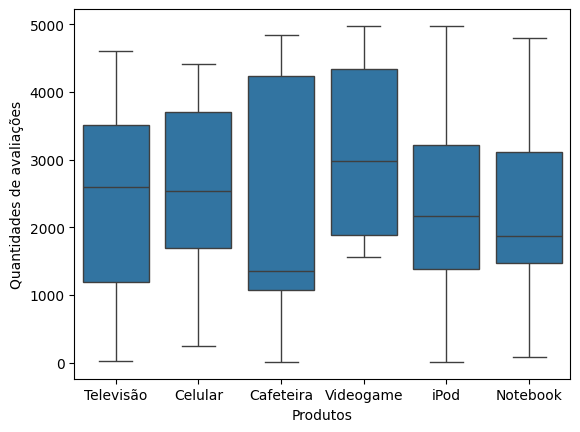

In [11]:
sns.boxplot(x='Produto', y='Quantidade de avaliações', data=df)
plt.xlabel('Produtos')
plt.ylabel('Quantidades de avaliações')
plt.show()

In [12]:
# 3)

df = df.dropna()

In [13]:
algoritmo = DecisionTreeClassifier()

In [14]:
produtos = df['Produto'].unique()

In [15]:
sc = StandardScaler()

In [ ]:
# from scipy import stats

In [16]:
mediaqtd = df.groupby('Produto')['Quantidade de avaliações'].mean()
mediaav = df.groupby('Produto')['Avaliação'].mean()

modas = df.groupby('Produto')['Comprou'].apply(lambda x: x.mode().iloc[0])

modas

Produto
Cafeteira    0
Celular      1
Notebook     1
Televisão    1
Videogame    1
iPod         0
Name: Comprou, dtype: int64

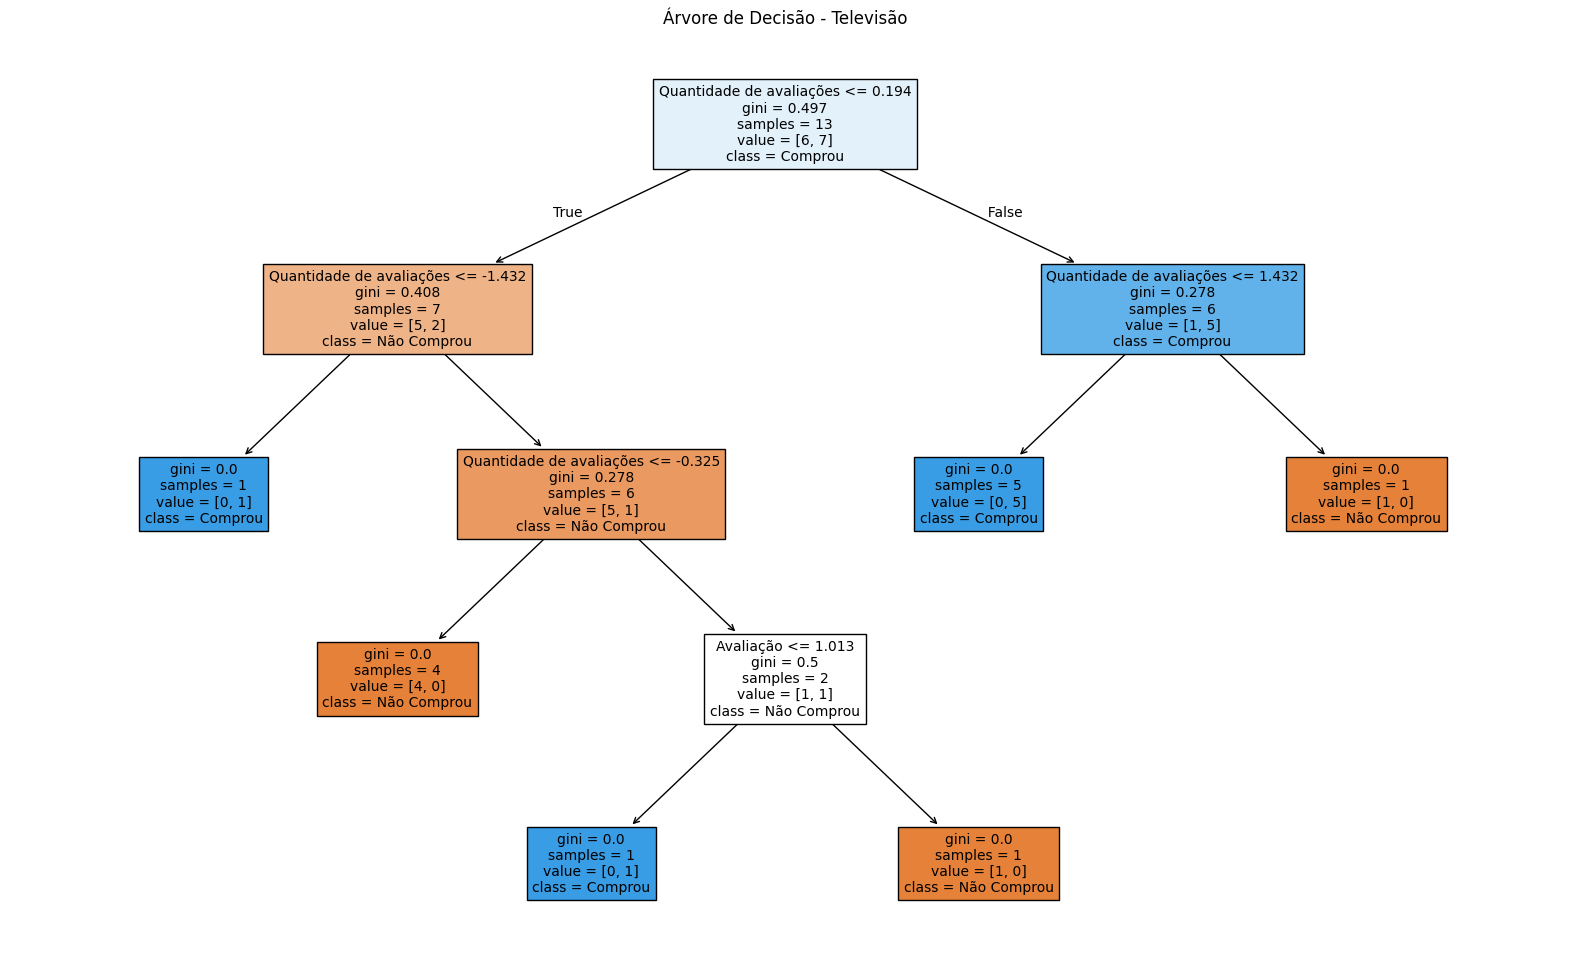

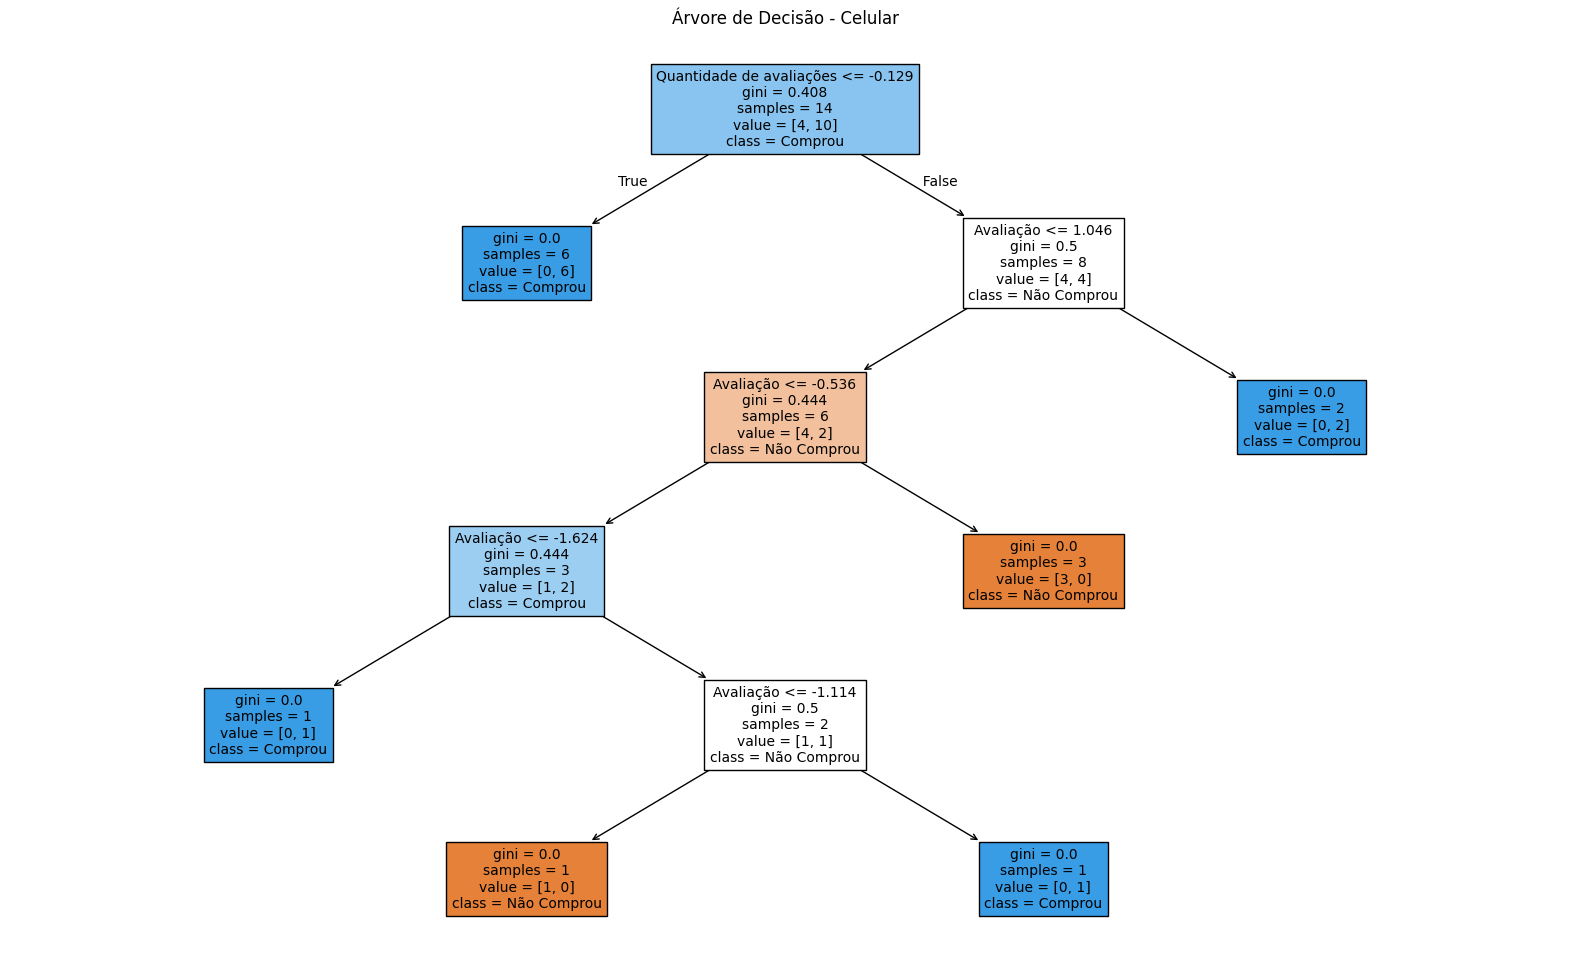

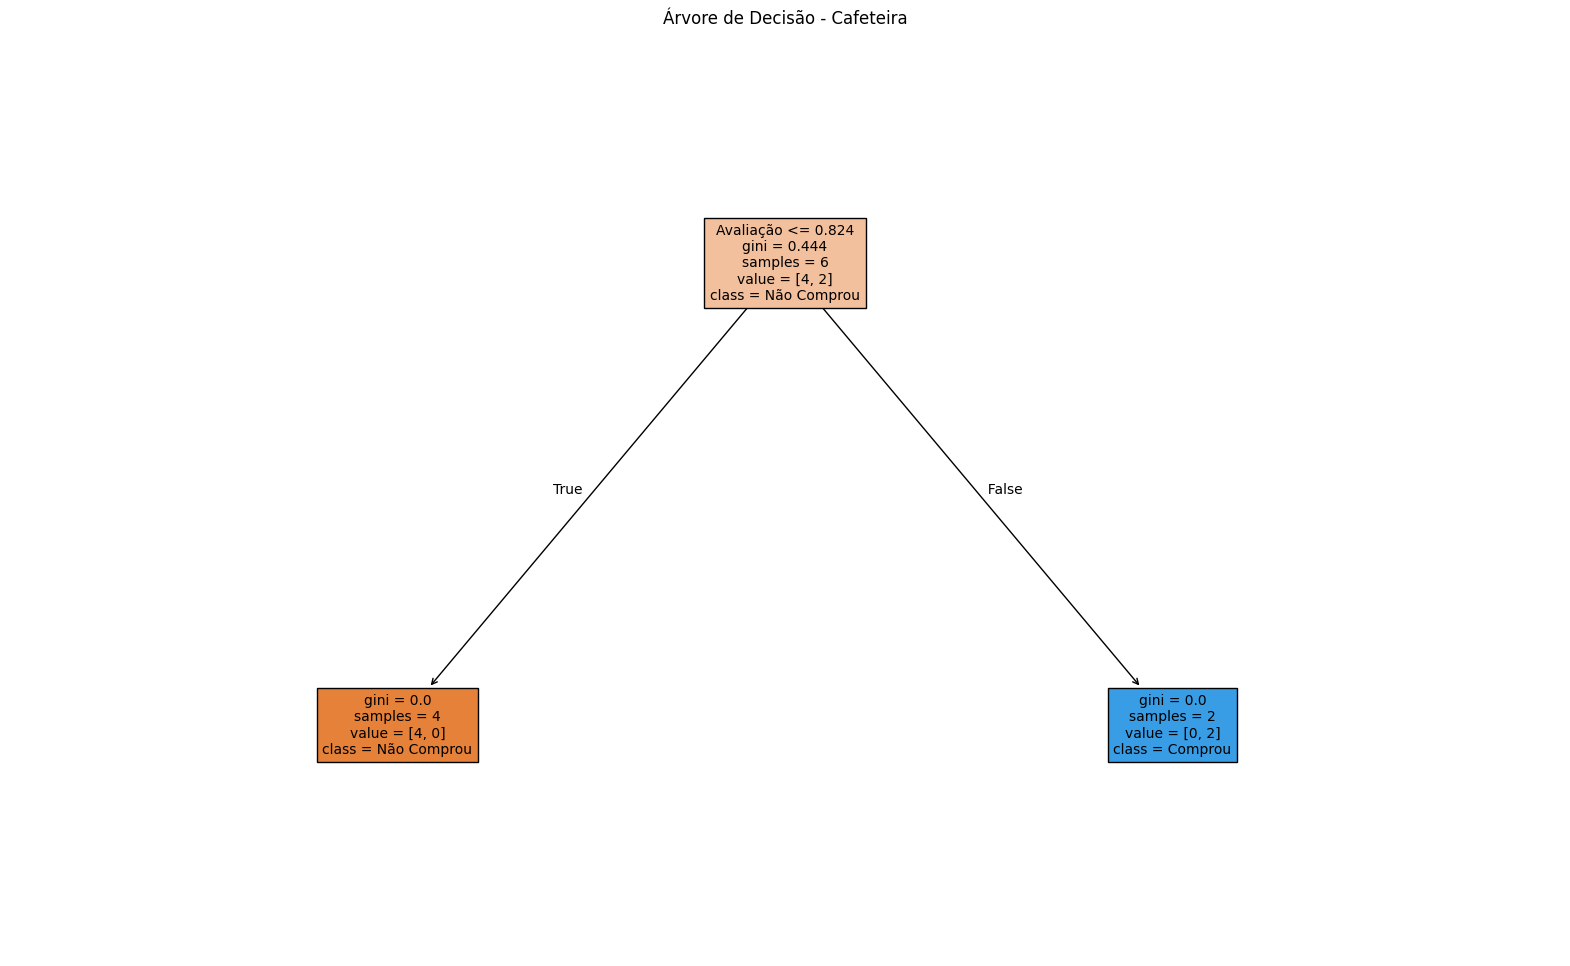

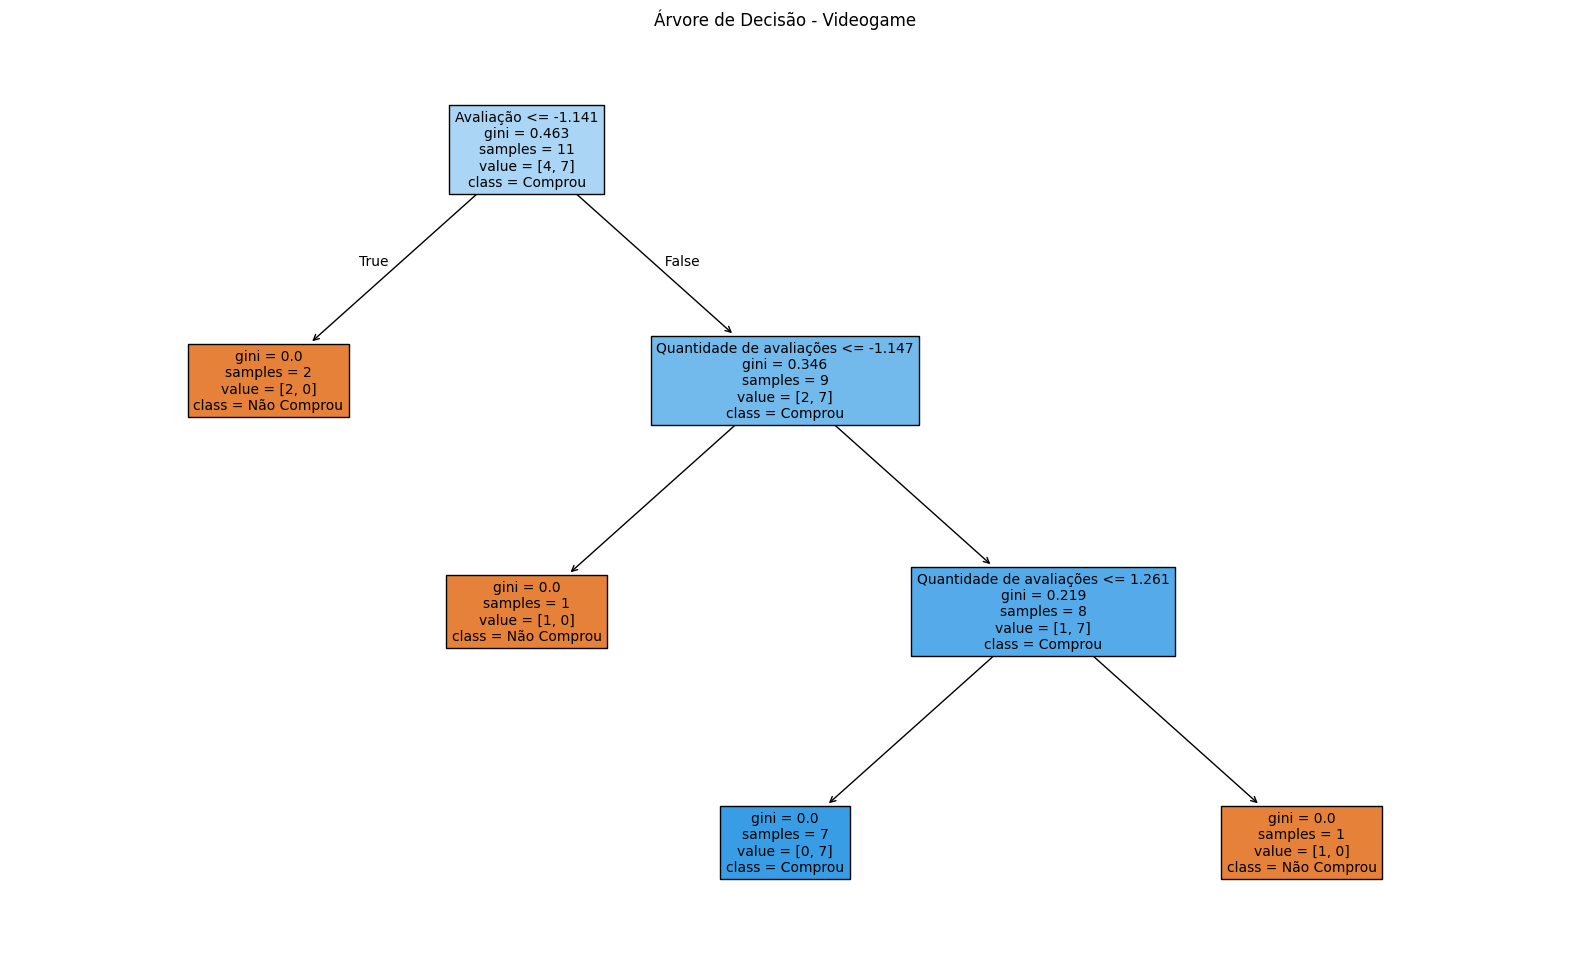

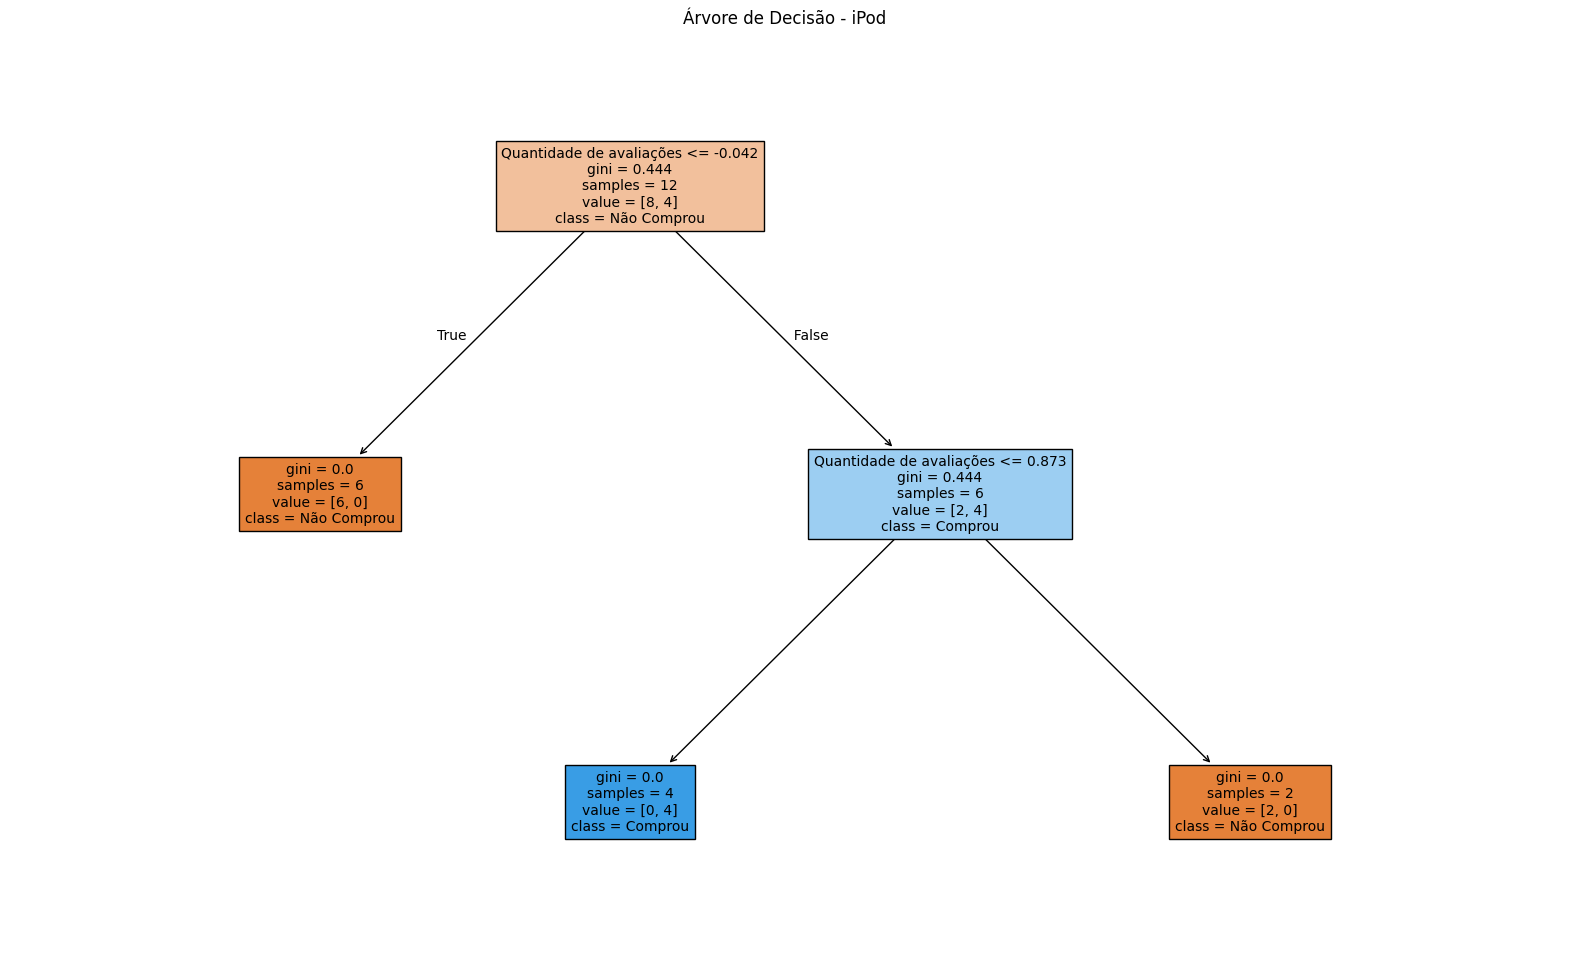

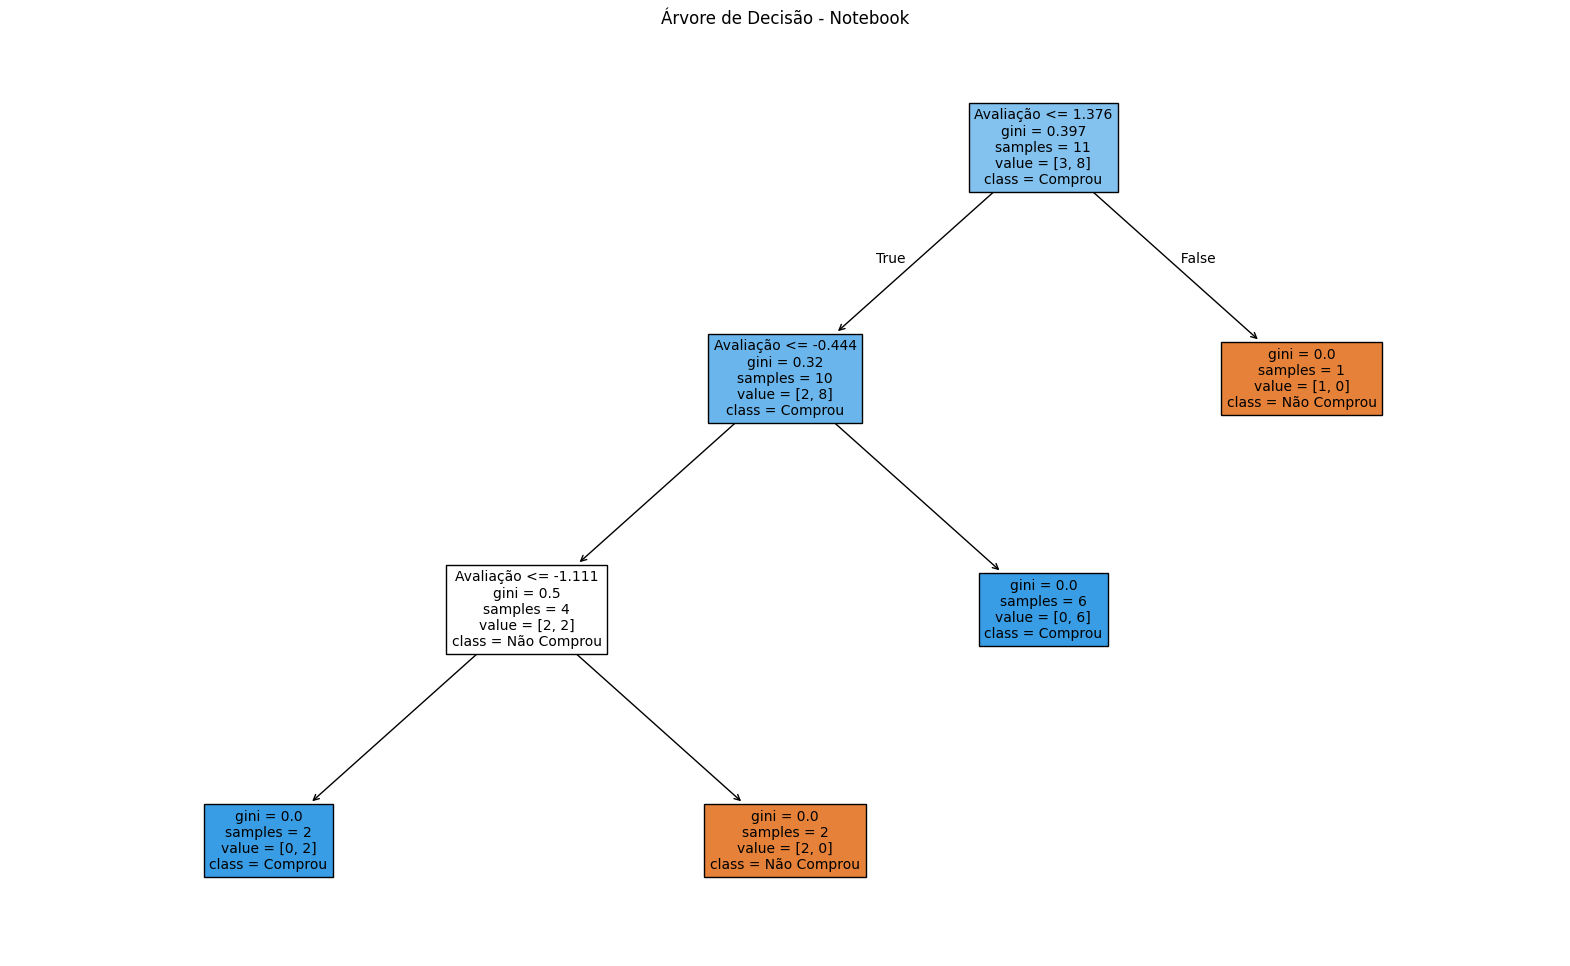

In [ ]:
# 4, 5, 6 e 8)

for produto in produtos:
    df_produto = df[df['Produto'] == produto].copy()
    X_deste_produto = df_produto[['Avaliação', 'Quantidade de avaliações']].values
    Y_deste_produto = df_produto['Comprou'].values

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_deste_produto, Y_deste_produto, test_size=0.3, random_state=42)
    X_treino = sc.fit_transform(X_treino)
    X_teste = sc.transform(X_teste)
    algoritmo.fit(X_treino, Y_treino)


    plt.figure(figsize=(20, 12))
    tree.plot_tree(algoritmo,
                    feature_names=['Avaliação', 'Quantidade de avaliações'],
                    class_names=['Não Comprou', 'Comprou'],
                    filled=True,
                    fontsize=10)
    plt.title(f'Árvore de Decisão - {produto}')
    plt.show()

In [ ]:

#7) 

print(f'Métricas por produto\n---------------------------')

for produto in produtos:
    df_produto = df[df['Produto'] == produto].copy()
    X_produto_data = df_produto[['Avaliação', 'Quantidade de avaliações']].values
    Y_produto_data = df_produto['Comprou'].values

    X_produto_scaled = sc.transform(X_produto_data)
    Y_pred_produto = algoritmo.predict(X_produto_scaled)

    accuracy = accuracy_score(Y_produto_data, Y_pred_produto)
    precision = precision_score(Y_produto_data, Y_pred_produto, zero_division=1)
    recall = recall_score(Y_produto_data, Y_pred_produto, zero_division=1)
    f1 = f1_score(Y_produto_data, Y_pred_produto, zero_division=1)
    cm = confusion_matrix(Y_produto_data, Y_pred_produto)

    print(f"Metricas de: {produto}:")
    print(f"   Amostras: {X_produto_data.shape[0]}")
    print(f"   Accuracy: {accuracy}")
    print(f"   Precision: {precision}")
    print(f"   Recall: {recall}")
    print(f"   F1 Score: {f1}")
    print("   Confusion Matrix:")
    print(cm)
    print("-" * 30)

Métricas por produto
---------------------------
Metricas de: Televisão:
   Amostras: 19
   Accuracy: 0.5789473684210527
   Precision: 0.6153846153846154
   Recall: 0.7272727272727273
   F1 Score: 0.6666666666666666
   Confusion Matrix:
[[3 5]
 [3 8]]
------------------------------
Metricas de: Celular:
   Amostras: 21
   Accuracy: 0.38095238095238093
   Precision: 0.5
   Recall: 0.46153846153846156
   F1 Score: 0.48
   Confusion Matrix:
[[2 6]
 [7 6]]
------------------------------
Metricas de: Cafeteira:
   Amostras: 9
   Accuracy: 0.2222222222222222
   Precision: 0.25
   Recall: 0.6666666666666666
   F1 Score: 0.36363636363636365
   Confusion Matrix:
[[0 6]
 [1 2]]
------------------------------
Metricas de: Videogame:
   Amostras: 17
   Accuracy: 0.47058823529411764
   Precision: 0.625
   Recall: 0.45454545454545453
   F1 Score: 0.5263157894736842
   Confusion Matrix:
[[3 3]
 [6 5]]
------------------------------
Metricas de: iPod:
   Amostras: 18
   Accuracy: 0.3888888888888889
  

In [ ]:
#9)

print("Conclusão - Os modelos de árvore de decisão demonstram desempenhos distintos conforme o produto avaliado. \n" \
"O recall se mantém elevado (1.0 na maioria dos casos), o que mostra que os modelos conseguem identificar \n" \
"praticamente todas as compras reais. Por outro lado, as métricas de precisão e acurácia são mais baixas, \n" \
"indicando que há previsões incorretas para casos em que não houve compra. Assim, embora os modelos sejam eficientes \n" \
"para encontrar possíveis compradores, eles ainda apresentam uma quantidade considerável de falsos positivos.")

Os modelos de árvore de decisão demonstram desempenhos distintos conforme o produto avaliado. 
O recall se mantém elevado (1.0 na maioria dos casos), o que mostra que os modelos conseguem identificar 
praticamente todas as compras reais. Por outro lado, as métricas de precisão e acurácia são mais baixas, 
indicando que há previsões incorretas para casos em que não houve compra. Assim, embora os modelos sejam eficientes 
para encontrar possíveis compradores, eles ainda apresentam uma quantidade considerável de falsos positivos.
